In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models, layers

In [2]:
from tensorflow.keras.datasets import cifar10
import numpy
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
train_labels.shape

(50000, 1)

In [5]:
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

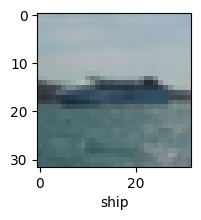

In [9]:
plot_sample(train_images, train_labels, 5987)

In [10]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [11]:
def create_model():
    inputs = keras.Input(shape=(32,32,3))
    #x = data_augmentation(inputs)
    x = inputs

    x = keras.layers.Conv2D(32, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(32, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPool2D(2)(x)
    x = keras.layers.SpatialDropout2D(0.2)(x)


    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPool2D(2)(x)
    x = keras.layers.SpatialDropout2D(0.2)(x)

    residual = x
    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.add([x,residual])


    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    outputs = keras.layers.Dense(10, activation="softmax")(x)

    model =keras.Model(inputs, outputs)
    return model






In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
callbacks = [EarlyStopping(patience=3,monitor='val_accuracy', restore_best_weights=True)]

In [14]:
model = create_model()

In [15]:
from tensorflow.keras.optimizers import Adam

In [16]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, callbacks=callbacks, epochs=50, batch_size = 8, validation_data=(test_images, test_labels))

Epoch 1/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.3738 - loss: 1.7073 - val_accuracy: 0.6167 - val_loss: 1.0692
Epoch 2/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.5818 - loss: 1.1750 - val_accuracy: 0.6675 - val_loss: 0.9319
Epoch 3/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.6401 - loss: 1.0258 - val_accuracy: 0.7248 - val_loss: 0.8055
Epoch 4/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.6840 - loss: 0.9004 - val_accuracy: 0.7459 - val_loss: 0.7320
Epoch 5/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.7044 - loss: 0.8381 - val_accuracy: 0.7631 - val_loss: 0.6915
Epoch 6/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.7263 - loss: 0.7782 - val_accuracy: 0.7857 - val_loss: 0.6244
Epoch 7/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.7429 - loss: 0.7409 - val_accuracy: 0.7922 - val_loss: 0.6096
Epoch 8/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.7581 - loss: 0

In [18]:
from sklearn.metrics import classification_report

In [19]:
import pprint

In [20]:
y_pred = model.predict(test_images).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [21]:
pprint.pprint(classification_report(test_labels, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.85      0.87      0.86      1000\n'
 '           1       0.93      0.93      0.93      1000\n'
 '           2       0.77      0.78      0.77      1000\n'
 '           3       0.74      0.68      0.71      1000\n'
 '           4       0.83      0.84      0.83      1000\n'
 '           5       0.75      0.79      0.77      1000\n'
 '           6       0.89      0.88      0.89      1000\n'
 '           7       0.91      0.88      0.89      1000\n'
 '           8       0.93      0.92      0.93      1000\n'
 '           9       0.89      0.92      0.91      1000\n'
 '\n'
 '    accuracy                           0.85     10000\n'
 '   macro avg       0.85      0.85      0.85     10000\n'
 'weighted avg       0.85      0.85      0.85     10000\n')


In [22]:
import seaborn as sns

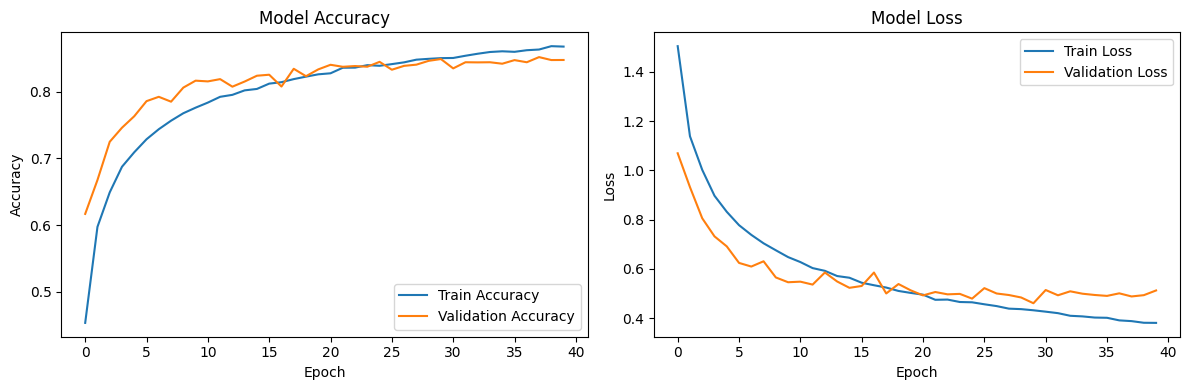

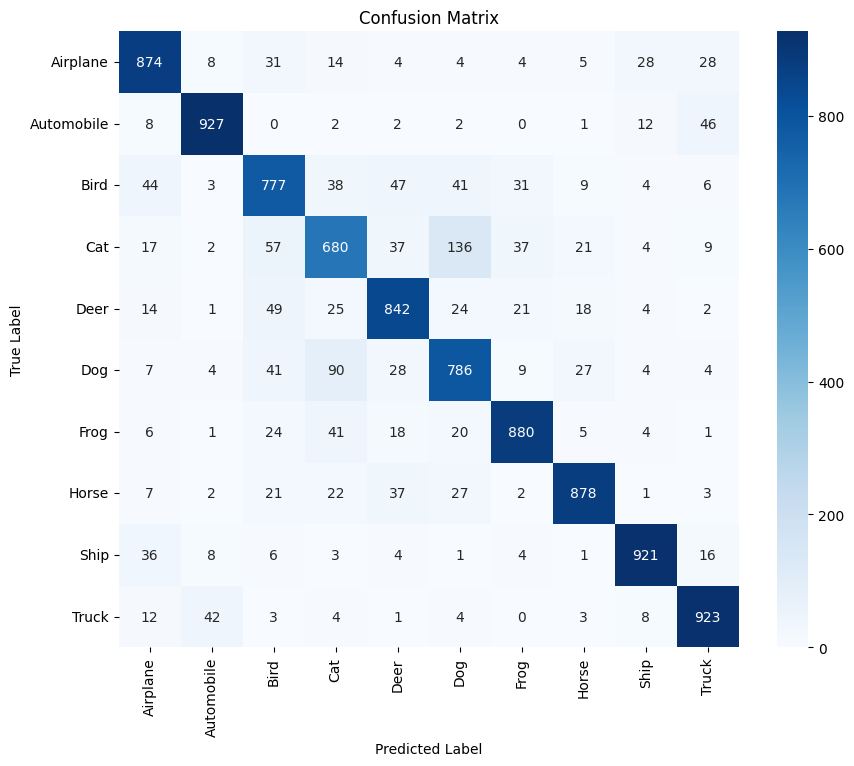

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = tf.math.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Make predictions and plot confusion matrix
class_names = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]
plot_confusion_matrix(test_labels, y_pred, class_names)

In [24]:
import numpy as np
from PIL import Image
import tensorflow as tf

def preprocess_image(image_path):
    # Open the image
    img = Image.open(image_path)

    # Convert to RGB if the image has an alpha channel
    #if img.mode == 'RGBA':
        #img = img.convert('RGB')

    # Resize to 32x32 pixels
    img = img.resize((32, 32))

    # Convert to numpy array and normalize
    img_array = np.array(img).astype('float32') / 255.0

    # Reshape to (1, 32, 32, 3) for model input
    img_array = img_array.reshape(1, 32, 32, 3)

    return img_array

In [25]:
def predict_class(model, image_array):
    # Make prediction
    prediction = model.predict(image_array)
    print(prediction)
    # Get the class with highest probability
    class_index = np.argmax(prediction)

    print(class_index)

    # Define class names
    class_names = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

    print(len(class_names))

    # Get the predicted class name
    predicted_class = class_names[class_index]

    # Get the confidence (probability)
    confidence = prediction[0][class_index]

    return predicted_class, confidence

In [32]:
# Assume 'model' is your trained model
# Replace 'path_to_your_image.jpg' with the actual path to your image
image_path = '/content/pexels-pixabay-358319.jpg'

# Preprocess the image
processed_image = preprocess_image(image_path)

# Predict the class
predicted_class, confidence = predict_class(model, processed_image)

# Print the results

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[9.9952233e-01 2.3778832e-10 4.7717770e-04 3.4319245e-07 3.6520537e-10
  1.7785268e-08 9.8180764e-10 8.9070201e-10 4.0663521e-09 1.4949792e-07]]
0
10
Predicted class: Airplane
Confidence: 1.00


In [27]:
#saving the model for use in a user interface if needed
model.save('ciphar10_imageclass.h5')